## Analysis of ford bikeshare trips in San Francisco Bay area
## by Samuel Ayer

## Investigation Overview

I wanted to analyze the average duration and distance of trips in the San Francisco Bay area bike-share system. I also wanted to investigate how this changed for each user type and gender of riders. I was also interested in discovering the peak hours and days of trips. After my investigations, I discovered the following which I will be sharing in the presentation;

* The average trip took 9 minutes.
* Thursdays had the most trips
* The peak hours were from 07:00 to 09:00 and 16:00 and 18:00
* On the average, customers spent more time on trips than subscibers


## Dataset Overview
The data used contains 165412 observations of trips using the bike-share system. It includes variables like duration, distance,gender, start time and end time. The original dataset contained more rows and less columns but some rows were dropped to clean the data and some columns were added to facilitate analysis and visualizations. The data was collected on trips in February 2019.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
ford = pd.read_csv('fordgobike-tripdata.csv')
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,dow,hour_of_day,age,distance
0,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,Thursday,23,36,2.03
1,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992,Male,No,Thursday,23,27,3.66
2,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996,Female,Yes,Thursday,23,23,0.98
3,506,2019-02-28 23:56:55.540,2019-03-01 00:05:21.733,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,343.0,Bryant St at 2nd St,37.783172,-122.393572,5848,Subscriber,1993,Male,No,Thursday,23,26,1.61
4,1176,2019-02-28 23:45:12.651,2019-03-01 00:04:49.184,127.0,Valencia St at 21st St,37.756708,-122.421025,323.0,Broadway at Kearny,37.798014,-122.405950,5328,Customer,1990,Male,No,Thursday,23,29,4.78


In [4]:
ford.shape

(165419, 20)

## Distribution of duration (minutes)

The minium duration is 1 minute and the maximum duration is 26 minutes. Majority of the distribution fall between 5 minutes and 15 minutes with a peak around 9 minutes. The original data is skewed but plotted on a logarithmic scale, the distribution assumes an almost normal shape.

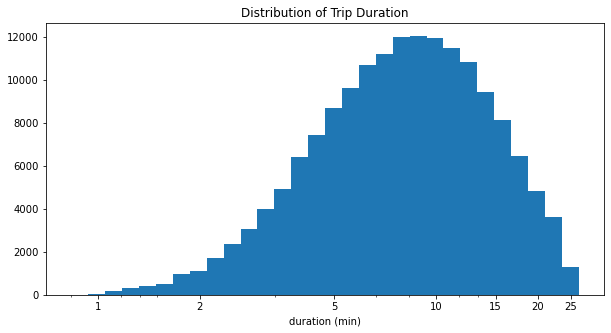

In [5]:
# generating bins
bins = 10**np.arange(1.7,3.2+0.05,0.05)
# plotting distribution
plt.figure(figsize=(10,5))
plt.hist(data=ford,x='duration_sec',bins=bins)
plt.xscale('log')
# giving tick labels on x axis
plt.xticks([60,120,300,600,900,1200,1500],[1,2,5,10,15,20,25])
plt.title('Distribution of Trip Duration')
plt.xlabel('duration (min)');

## Trips by Day of the Week
Most trips were taken on Thursdays and Sundays had the least trips.

In [6]:
# order of day names
day_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
dow_ordered = pd.api.types.CategoricalDtype(ordered=True, categories= day_of_week)
# assigning ordered category to column
ford['dow'] = ford['dow'].astype(dow_ordered)

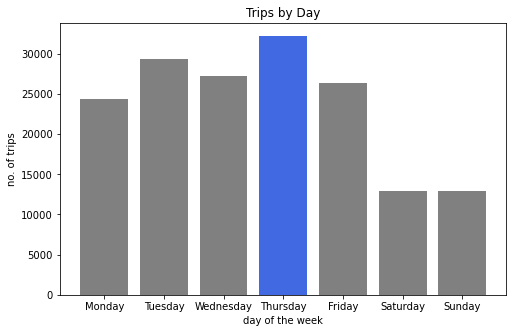

In [7]:
x = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y = ford['dow'].value_counts(sort=False)
colors = ['grey','grey','grey','royalblue','grey','grey','grey']
plt.figure(figsize=(8,5))
plt.bar(x,y,color=colors)
plt.title('Trips by Day')
plt.xlabel('day of the week')
plt.ylabel('no. of trips');

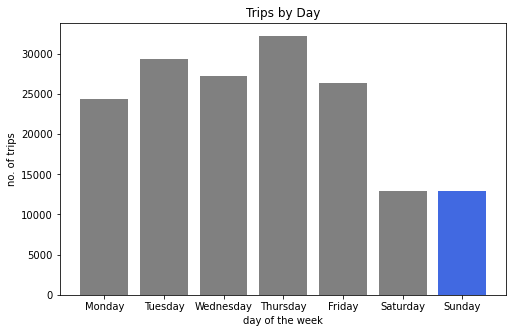

In [8]:
x = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
y = ford['dow'].value_counts(sort=False)
colors = ['grey','grey','grey','grey','grey','grey','royalblue']
plt.figure(figsize=(8,5))
plt.bar(x,y,color=colors)
plt.title('Trips by Day')
plt.xlabel('day of the week')
plt.ylabel('no. of trips');

## Peak Periods for Weekdays and Weekends

Overall, there are two peak periods. The first peak period is between 7:00 to 9:00 and the second peak period is between 16:00 and 18:00.

These peak periods remain the same on weekdays however it is different on weekends.

On weekends, there is only one peak period and it is between 13:00 to 16:00

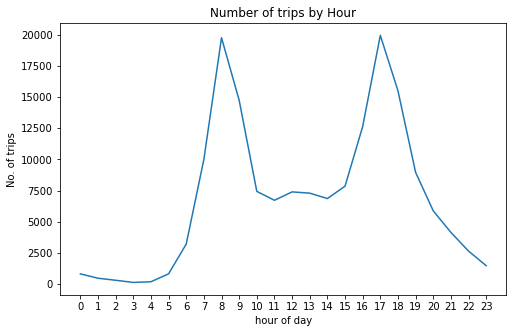

In [9]:
x = ford['hour_of_day'].unique()
y = ford['hour_of_day'].value_counts(sort=False)
# since the ticks and labels are the same one variable will be used
ticks = np.arange(0,24,1)
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.xticks(ticks)
plt.title('Number of trips by Hour')
plt.xlabel('hour of day')
plt.ylabel('No. of trips');

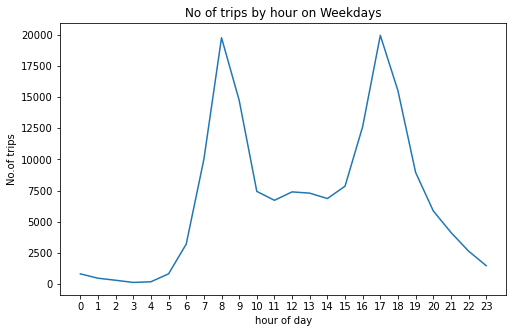

In [10]:
x = ford.query('dow != "Saturday" | dow != "Sunday"')['hour_of_day'].unique()
y = ford.query('dow != "Saturday" | dow != "Sunday"')['hour_of_day'].value_counts(sort=False)
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.title('No of trips by hour on Weekdays')
plt.xticks(ticks)
plt.xlabel('hour of day')
plt.ylabel('No.of trips');

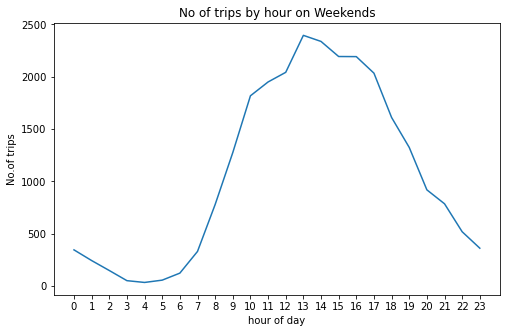

In [11]:
x = ford.query('dow == "Saturday" | dow == "Sunday"')['hour_of_day'].unique()
y = ford.query('dow == "Saturday" | dow == "Sunday"')['hour_of_day'].value_counts(sort=False)
plt.figure(figsize=(8,5))
plt.plot(x,y)
plt.title('No of trips by hour on Weekends')
plt.xticks(ticks)
plt.xlabel('hour of day')
plt.ylabel('No.of trips');

## Average trip duration by User type

With an average duration of 716.6 seconds, Customers spent more time on trips than Subscribers who averaged 535.3 seconds.

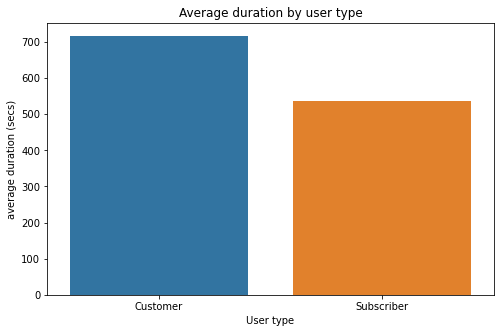

In [12]:
# calculating mean duration and grouping by user type
user_dur = ford.groupby('user_type',as_index=False)['duration_sec'].mean()
# plotting means on bar plot
plt.figure(figsize=(8,5))
sb.barplot(data=user_dur,x='user_type',y='duration_sec')
plt.title('Average duration by user type')
plt.xlabel('User type')
plt.ylabel('average duration (secs)');

## Average distance by User type

On the average, Customers covered more distance on trips than Subscribers.

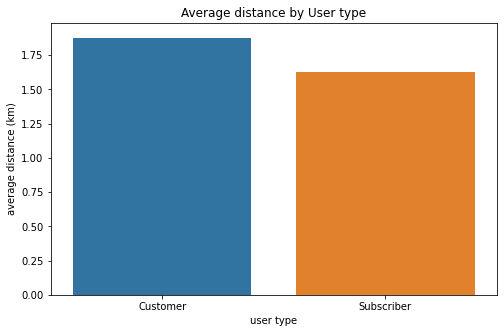

In [13]:
# calculating mean distance and grouping by user type
user_dis = ford.groupby('user_type',as_index=False)['distance'].mean()
plt.figure(figsize=(8,5))
sb.barplot(data=ford,x='user_type',y='distance',order=['Customer','Subscriber'],errwidth=0)
plt.title('Average distance by User type')
plt.xlabel('user type')
plt.ylabel('average distance (km)');

### End of presentation

#### Thank You!

In [1]:
!jupyter nbconvert fordbike_part_II.ipynb --to slides --post serve --no-input --no-prompt

^C
